In [1]:
import subprocess
import numpy as np
import pandas as pd

In [2]:
dfUrls = pd.read_csv("urls_to_get.csv")
dfUrls.head()

,urls
0,https://s3.amazonaws.com/tripdata/201901-citib...
1,https://s3.amazonaws.com/tripdata/201902-citib...
2,https://s3.amazonaws.com/tripdata/201903-citib...
3,https://s3.amazonaws.com/tripdata/201904-citib...
4,https://s3.amazonaws.com/tripdata/201905-citib...


In [ ]:
dfWeather = pd.read_csv("Weather_Results.csv")
dfWeather.head()

,Type,Severity,StartTime(UTC),EndTime(UTC),LocationLat,LocationLng,City,County,State,ZipCode
0,Cold,Severe,1/7/2016 13:55,1/7/2016 14:15,42.1534,-79.258,Jamestown,Chautauqua,NY,14701
1,Cold,Severe,1/20/2016 17:35,1/20/2016 17:55,42.1534,-79.258,Jamestown,Chautauqua,NY,14701
2,Cold,Severe,1/22/2016 17:35,1/22/2016 17:55,42.1534,-79.258,Jamestown,Chautauqua,NY,14701
3,Cold,Severe,1/22/2016 18:15,1/22/2016 18:35,42.1534,-79.258,Jamestown,Chautauqua,NY,14701
4,Cold,Severe,2/16/2016 10:55,2/16/2016 11:15,42.1534,-79.258,Jamestown,Chautauqua,NY,14701


In [3]:
for i,row in dfUrls.iterrows():
  print(row['urls'])
  subprocess.run(['wget',row['urls']])
  subprocess.run(['unzip',row['urls'].split("/")[-1]])

https://s3.amazonaws.com/tripdata/201901-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201902-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201903-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201904-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201905-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201906-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201907-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201908-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201909-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201910-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201911-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201912-citibike-tripdata.csv.zip


In [4]:
result = subprocess.run(["ls"],capture_output=True,text=True)

In [5]:
import os
# Find the latest version of spark 3.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.2'
spark_version = 'spark-3.1.1'
os.environ['SPARK_VERSION']=spark_version
# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark
# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"
# Start a SparkSession
import findspark
findspark.init()

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:13 https://developer.

In [6]:
df_01 = "201901-citibike-tripdata.csv"
df_02 = "201902-citibike-tripdata.csv"
df_03 = "201903-citibike-tripdata.csv"
df_04 = "201904-citibike-tripdata.csv"
df_05 = "201905-citibike-tripdata.csv"
df_06 = "201906-citibike-tripdata.csv"
df_07 = "201907-citibike-tripdata.csv"
df_08 = "201908-citibike-tripdata.csv"
df_09 = "201909-citibike-tripdata.csv"
df_10 = "201910-citibike-tripdata.csv"
df_11 = "201911-citibike-tripdata.csv"
df_12 = "201912-citibike-tripdata.csv"

In [7]:
csv_list = [df_01,df_02,df_03,df_04,df_05,df_06,df_07,df_08,df_09,df_10,df_11,df_12]
csv_list

['201901-citibike-tripdata.csv',
 '201902-citibike-tripdata.csv',
 '201903-citibike-tripdata.csv',
 '201904-citibike-tripdata.csv',
 '201905-citibike-tripdata.csv',
 '201906-citibike-tripdata.csv',
 '201907-citibike-tripdata.csv',
 '201908-citibike-tripdata.csv',
 '201909-citibike-tripdata.csv',
 '201910-citibike-tripdata.csv',
 '201911-citibike-tripdata.csv',
 '201912-citibike-tripdata.csv']

In [8]:
from pyspark import SparkFiles
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CitiBikeFinal").getOrCreate()
#The odd columns hash is where the column names are not matching with most of the other dataframes
url = f"/content/{csv_list[0]}"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get(csv_list[0]), header=True, inferSchema=True, timestampFormat="yyyy-MM-dd HH:mm:ss:ms")

In [9]:
citibikeSchema=df.schema
for csvfile in csv_list[1:]:
    fileloc = f"/content/{csvfile}"
    print("Loading: "+fileloc)   
    spark.sparkContext.addFile(fileloc)
    df2 = spark.read.csv(SparkFiles.get(csvfile), header=True, schema=citibikeSchema)
    # Important!!!
    df = df.union(df2)
    

Loading: /content/201902-citibike-tripdata.csv
Loading: /content/201903-citibike-tripdata.csv
Loading: /content/201904-citibike-tripdata.csv
Loading: /content/201905-citibike-tripdata.csv
Loading: /content/201906-citibike-tripdata.csv
Loading: /content/201907-citibike-tripdata.csv
Loading: /content/201908-citibike-tripdata.csv
Loading: /content/201909-citibike-tripdata.csv
Loading: /content/201910-citibike-tripdata.csv
Loading: /content/201911-citibike-tripdata.csv
Loading: /content/201912-citibike-tripdata.csv


In [10]:
df =df.dropna()

In [ ]:
# Show the hour for the date column
from pyspark.sql.functions import hour
df.select(hour(df["starttime"]))

DataFrame[hour(starttime): int]

In [ ]:
df = df.withColumn("hour", hour(df['starttime']))

In [ ]:
df_morning= df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] < '4').show()

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|hour|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----+
|         320|2019-01-01 00:01:...|2019-01-01 00:07:...|            3160|Central Park West...|           40.77896784|           -73.97374737|          3283|W 89 St & Columbu...|          40.7882213|         -73.970

In [ ]:
morning_count = df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] < '4')

In [ ]:
morning_count.groupBy(morning_count['usertype']).count().show()

+----------+------+
|  usertype| count|
+----------+------+
|Subscriber|322412|
|  Customer| 74022|
+----------+------+



In [ ]:
morn_count = morning_count.orderBy('usertype').groupBy('hour').count()
morn_count.show()

+----+------+
|hour| count|
+----+------+
|   1|105233|
|   3| 41559|
|   2| 64308|
|   0|185334|
+----+------+



In [ ]:
morning_count_02 = df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] >= '4').filter(df['hour'] < '8')

In [ ]:
morning_count_02.groupBy(morning_count['usertype']).count().show()

+----------+-------+
|  usertype|  count|
+----------+-------+
|Subscriber|1492045|
|  Customer|  69165|
+----------+-------+



In [ ]:
morn_count_02 = morning_count_02.orderBy('usertype').groupBy('hour').count()
morn_count_02.show()

+----+------+
|hour| count|
+----+------+
|   6|443047|
|   5|139887|
|   4| 44897|
|   7|933379|
+----+------+



In [ ]:
afternoon_count = df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] >= '8').filter(df['hour'] < '12')

In [ ]:
afternoon_count.groupBy(morning_count['usertype']).count().show()

+----------+-------+
|  usertype|  count|
+----------+-------+
|Subscriber|4335299|
|  Customer| 517028|
+----------+-------+



In [ ]:
after_count = afternoon_count.orderBy('usertype').groupBy('hour').count()
after_count.show()

+----+-------+
|hour|  count|
+----+-------+
|   9|1308178|
|   8|1626764|
|  10| 939101|
|  11| 978284|
+----+-------+



In [ ]:
afternoon_count_02 = df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] >= '12').filter(df['hour'] < '16')

In [ ]:
afternoon_count_02.groupBy(morning_count['usertype']).count().show()

+----------+-------+
|  usertype|  count|
+----------+-------+
|Subscriber|3794533|
|  Customer| 966961|
+----------+-------+



In [ ]:
after_count_02 = afternoon_count_02.orderBy('usertype').groupBy('hour').count()
after_count_02.show()

+----+-------+
|hour|  count|
+----+-------+
|  12|1122549|
|  13|1163987|
|  15|1270208|
|  14|1204750|
+----+-------+



In [ ]:
night_count = df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] >= '16').filter(df['hour'] < '20')

In [ ]:
night_count.groupBy(morning_count['usertype']).count().show()

+----------+-------+
|  usertype|  count|
+----------+-------+
|Subscriber|5742166|
|  Customer| 910988|
+----------+-------+



In [ ]:
nigh_count = night_count.orderBy('usertype').groupBy('hour').count()
nigh_count.show()

+----+-------+
|hour|  count|
+----+-------+
|  16|1458398|
|  19|1314576|
|  17|2002482|
|  18|1877698|
+----+-------+



In [ ]:
night_count_02 = df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] >= '20').filter(df['hour'] < '24')

In [ ]:
night_count_02.groupBy(morning_count['usertype']).count().show()

+----------+-------+
|  usertype|  count|
+----------+-------+
|Subscriber|1993066|
|  Customer| 334012|
+----------+-------+



In [ ]:
nigh_count_02 = night_count_02.orderBy('usertype').groupBy('hour').count()
nigh_count_02.show()

+----+------+
|hour| count|
+----+------+
|  22|477420|
|  20|899364|
|  23|318139|
|  21|632155|
+----+------+



In [ ]:
all_count = df.orderBy('usertype').groupBy('hour').count()
all_count.show()

+----+-------+
|hour|  count|
+----+-------+
|  12|1122549|
|  22| 477420|
|   1| 105233|
|  13|1163987|
|   6| 443047|
|  16|1458398|
|   3|  41559|
|  20| 899364|
|   5| 139887|
|  19|1314576|
|  15|1270208|
|   9|1308178|
|  17|2002482|
|   4|  44897|
|   8|1626764|
|  23| 318139|
|   7| 933379|
|  10| 939101|
|  21| 632155|
|  11| 978284|
+----+-------+
only showing top 20 rows



In [ ]:
count_df = all_count.toPandas()

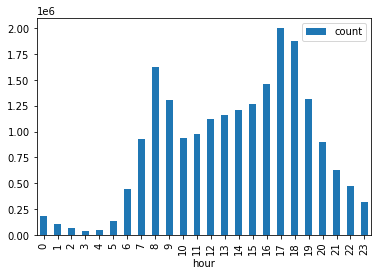

In [ ]:
import matplotlib.pyplot as plt
count_df = count_df.sort_values("hour", ascending=True)
count_df.set_index("hour", inplace=True)
count_df.plot.bar()

In [ ]:
user_count = df.groupBy('usertype').count().show()
user_count

+----------+--------+
|  usertype|   count|
+----------+--------+
|Subscriber|17679521|
|  Customer| 2872176|
+----------+--------+



In [ ]:
import matplotlib.pyplot as plt
counts = df.orderBy('birth year').groupBy('gender').count()

In [ ]:
counts.show()

+------+--------+
|gender|   count|
+------+--------+
|     1|14052393|
|     2| 4938996|
|     0| 1560308|
+------+--------+



In [ ]:
pie_df = counts.toPandas()

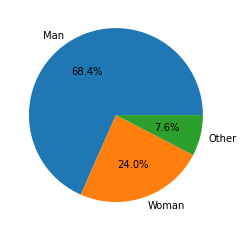

In [ ]:
import matplotlib.pyplot as plt
plt.pie(pie_df['count'].values,labels=["Man","Woman","Other"],autopct='%1.1f%%')
plt.show()

In [ ]:
# Show the month for the date column
from pyspark.sql.functions import month
df.select(month(df["starttime"]))

DataFrame[month(starttime): int]

In [ ]:
df = df.withColumn("month", month(df['starttime']))

In [ ]:
import matplotlib.pyplot as plt
month_count = df.orderBy('month').groupBy('month').count()
month_count.show()

+-----+-------+
|month|  count|
+-----+-------+
|   12| 955210|
|    1| 967287|
|    6|2125370|
|    3|1327960|
|    5|1924563|
|    9|2444900|
|    4|1766094|
|    8|2344224|
|    7|2181064|
|   10|2092573|
|   11|1478708|
|    2| 943744|
+-----+-------+



In [ ]:
bar_df = month_count.toPandas()

In [ ]:
bar_df = bar_df.sort_values("month", ascending=True)

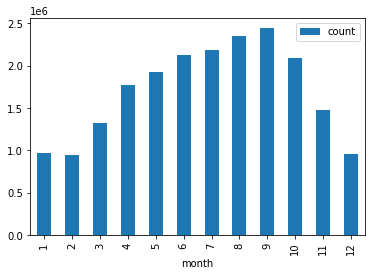

In [ ]:
import matplotlib.pyplot as plt
bar_df.set_index("month", inplace=True)
bar_df.plot.bar()

In [25]:
df.select("tripduration").describe().show()

+-------+------------------+
|summary|      tripduration|
+-------+------------------+
|  count|          20551697|
|   mean| 978.2454970020237|
| stddev|10553.040176545659|
|    min|                61|
|    max|           3812666|
+-------+------------------+

